# Exploration

## Preliminary exploration

We will first load the data and generate some priminary plots to better understand the data shape.

In [1]:
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
frontages = gpd.read_file('../../data/processed/frontages.json').set_index('frontage_id')
blocks = gpd.read_file('../../data/processed/blocks.json').set_index('block_id')
buildings = gpd.read_file('../../data/processed/buildings.json').set_index('building_id')
blockfaces = gpd.read_file('../../data/processed/blockfaces.json').set_index('blockface_id')
trash = gpd.read_file('../../data/processed/trash.json').set_index('id')

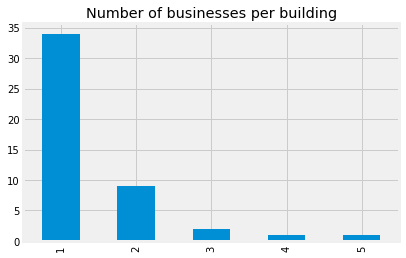

In [3]:
buildings.n_businesses.value_counts().sort_index().plot.bar(title='Number of businesses per building')

Most buildings in this dataset contain a single business, but there is a long tail of buildings containing two or more.

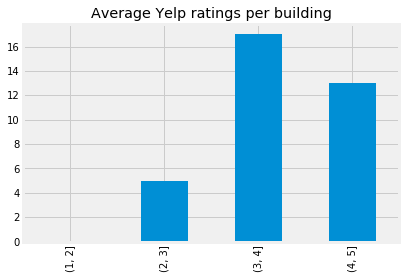

In [4]:
(pd.cut(buildings.avg_yelp_stars, [1, 2, 3, 4, 5])
 .value_counts()
 .sort_index()
 .plot.bar(title='Average Yelp ratings per building'))

The `buildings` `GeoDataFrame` concatenates `n_businesses` located in each building into a single value per observation using summary statistics. These stats are: `avg_yelp_stars`, `min_yelp_stars`, `max_yelp_stars`, `avg_yelp_dollars`, `min_yelp_dollars`, and `max_yelp_dollars`. Each of these summary statistics is calculated using the businesses in the building for which an observation for that value is present (certain businesses are missing a star rating or a $ value). If all businesses are missing that information, or if no business is present in the building, the value is set to `np.nan`.

Above is the `avg_yelp_stars` value for the businesses in the dataset. As you can see the `(3, 4]` range is most common.

We hypothesize that the star rating of the businesses in a building has a significant effect on the amount of trash located near it.

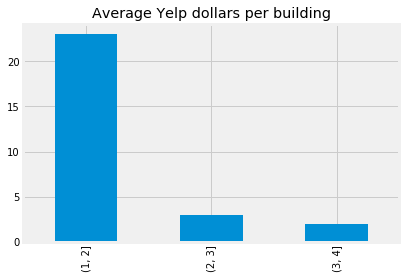

In [5]:
(pd.cut(buildings.avg_yelp_dollars, [1, 2, 3, 4])
 .value_counts()
 .sort_index()
 .plot.bar(title='Average Yelp dollars per building'))

The vast majority of places on Polk have 1 or 2 star ratings. Only five businesses in the dataset have higher ratings.

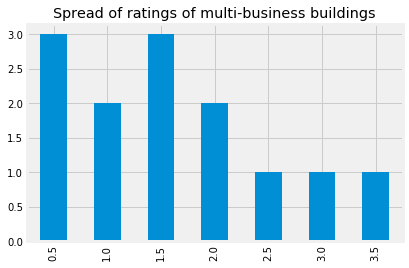

In [6]:
(buildings.query('n_businesses > 1')
 .pipe(lambda df: df.max_yelp_stars - df.min_yelp_stars)
 .value_counts()
 .sort_index()
 .plot.bar(title='Spread of ratings of multi-business buildings'))

The spread of star ratings for businesses at a location has a tendancy to be small, but that tendancy is relatively weak. It is common for businesses with high Yelp ratings to be coloated with businesses with low ones.

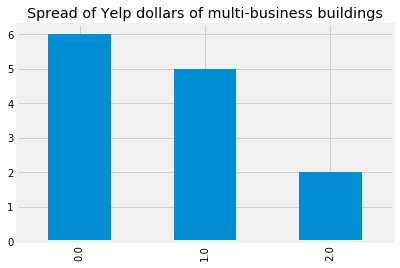

In [7]:
(buildings.query('n_businesses > 1')
 .pipe(lambda df: df.max_yelp_dollars - df.min_yelp_dollars)
 .value_counts()
 .sort_index()
 .plot.bar(title='Spread of Yelp dollars of multi-business buildings'))

There is a weak tendancy for buildings to colocate on dollar value, but this is too small a sample to say much about it.

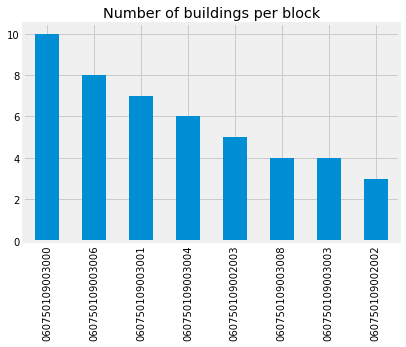

In [8]:
buildings.block_id.value_counts().plot.bar(title='Number of buildings per block')

There are eight blocks in the initial surve zone, in which the range of the number of buildings facing Polk Street ranges from 10 to 3. The three block is the left side of Polk between Green and Vallejo, more than half of which is occupied by a single large building containing five different businesses.

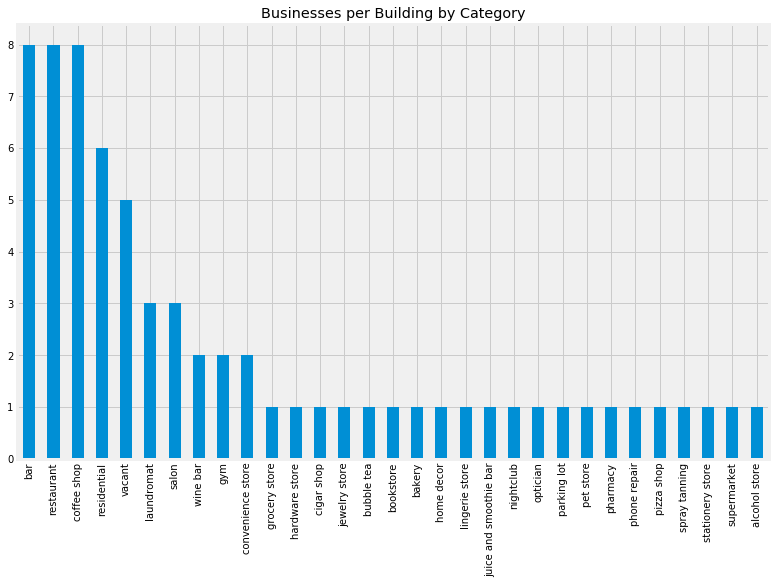

In [9]:
(buildings[[c for c in buildings.columns if c.startswith('has_')]]
 .pipe(lambda df: df.rename(columns={c: c.replace('has_', '').replace('_', ' ') for c in df.columns}))
 .sum(axis='rows')
 .sort_values(ascending=False)
 .plot.bar(figsize=(12, 8), title='Businesses per Building by Category')
)

Note that the `has_*` fields indicates at least *one* instance of a business of a type in a building, but there may be multiple. For example, bars tend to colocate.

We can generalize observations about certain types of especially common businesses, like bars, but many others we cannot say much about because we only have one or two observations of their class.

We'll look at trash data next.

In [10]:
trash.head()

,isSponsored,isValidated,itemsTagged,likes,street,type,description,time,user,userEmail,...,long,totalNumberOfItemsTagged,pickedUp,photoURL,side,frontage_id,block_id,building_id,blockface_id,geometry
id,,,,,,,,,,,,,,,,,,,,,
oZ0VkxjRsc2OZXeGpuhE,False,False,1,0,Polk St,tobacco,None,2018-10-30T16:57:15,Felipe Melivilu,private,...,-122.422495,1,True,https://firebasestorage.googleapis.com/v0/b/ru...,left,8127AC2E_1D16_4781_AE54_DA60A5A2E215_1,060750109003001,8127AC2E_1D16_4781_AE54_DA60A5A2E215,060750109003001_4,POINT (-122.4224950615438 37.79953718023017)
BhBORq0iTdzUOoc4HhvF,False,False,1,0,Polk St,other,None,2018-10-30T16:56:32,Felipe Melivilu,private,...,-122.422550,1,True,https://firebasestorage.googleapis.com/v0/b/ru...,left,A3D97542_0E4C_4FC9_A8B9_FFD503B7982E_0,060750109003001,A3D97542_0E4C_4FC9_A8B9_FFD503B7982E,060750109003001_4,POINT (-122.4225499628079 37.799499093041)
C2fK49FwtoYjcJKRHNnf,False,False,1,0,Polk St,other,None,2018-10-30T16:55:56,Felipe Melivilu,private,...,-122.422566,1,True,https://firebasestorage.googleapis.com/v0/b/ru...,left,E8EDE761_E216_43BA_A035_BF797CAE87CC_0,060750109003001,E8EDE761_E216_43BA_A035_BF797CAE87CC,060750109003001_4,POINT (-122.4225660414658 37.79931744583892)
ZVhOrwNjMMFGeGbv2NZh,False,False,1,0,Polk St,paper,None,2018-10-30T16:55:47,Felipe Melivilu,private,...,-122.422500,1,True,https://firebasestorage.googleapis.com/v0/b/ru...,left,C04E26FB_B8AD_4DC2_AA57_2D26CC20F479_0,060750109003001,C04E26FB_B8AD_4DC2_AA57_2D26CC20F479,060750109003001_4,POINT (-122.4224997344209 37.79928276555805)
PQZMtu04aRZtAWAOdsUe,False,False,1,0,Polk St,other,None,2018-10-30T16:55:41,Felipe Melivilu,private,...,-122.422475,1,True,https://firebasestorage.googleapis.com/v0/b/ru...,left,C04E26FB_B8AD_4DC2_AA57_2D26CC20F479_0,060750109003001,C04E26FB_B8AD_4DC2_AA57_2D26CC20F479,060750109003001_4,POINT (-122.4224747415819 37.79925063879936)


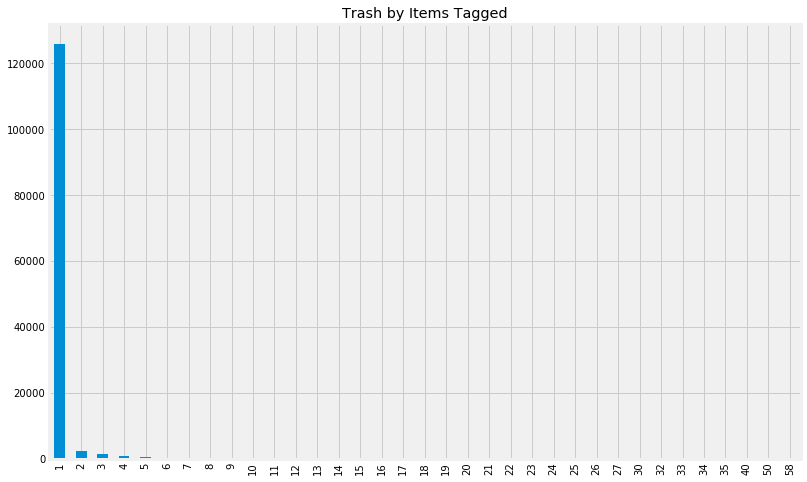

In [11]:
trash.itemsTagged.value_counts().sort_index().plot.bar(title='Trash by Items Tagged', figsize=(12, 8))

The `itemsTagged` value can be set at collection time to indicate that a certain numerical number of items were collected at once. The default value is one, and the number of non-default `itemsTagged` values is so vanishingly small that this column can basically be ignored as statistical noise.

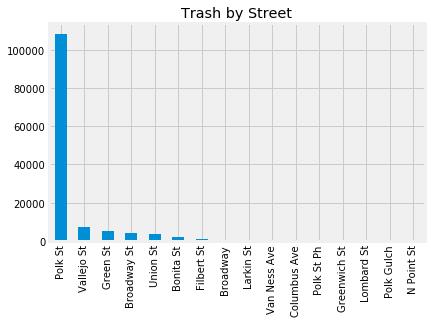

In [12]:
trash.street.value_counts().plot.bar(title='Trash by Street')

The `street` value is an automatic geocoding of the trash location that is based on its GPS coordinate. Points that are located close to intersections with a wide scatter from their true location (which occurs due to the innate inaccuracy of GPS) may be geocoded to cross-streets on Polk, even though we know that the actual survey zone only occurred on Polk Street, e.g. it did not touch any of the cross streets.

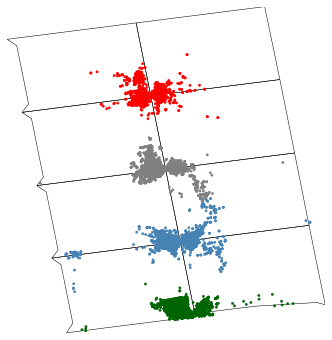

In [13]:
ax = gplt.pointplot(trash.query('street == "Vallejo St"'), color='steelblue')
gplt.pointplot(trash.query('street == "Green St"'), color='gray', ax=ax)
gplt.pointplot(trash.query('street == "Broadway St"'), color='darkgreen', ax=ax)
gplt.pointplot(trash.query('street == "Union St"'), color='red', ax=ax)
gplt.polyplot(blocks, ax=ax)

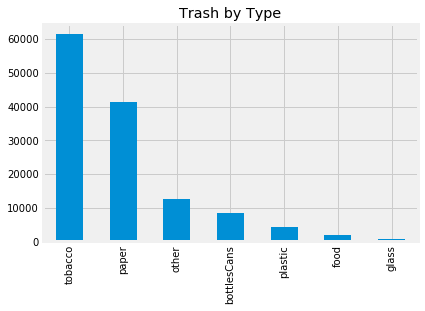

In [14]:
trash['type'].value_counts().plot.bar(title='Trash by Type')

The type ontology is one of the most interesting aspects of the data. There are six categories in use presently:

* Tobacco products, e.g. cigarette butts, which are numerically dominant.
* Paper products like coffee cups and such, which are second in number.
* Plastics, like packaging materials.
* Glass, e.g. bottles (broken shards are attempted to be counted individually, but it can be a challenge).
* Other, which contains "everything else", e.g. clothing, rubber bands, nails, styrofoam, and "unidentifiables".

The plastics category was originally "bottles and cans"; the swap to plastics was made relatively early in the lifetime of the survey zone. 

In [19]:
trash = trash.assign(
    time=pd.to_datetime(trash.time)
)

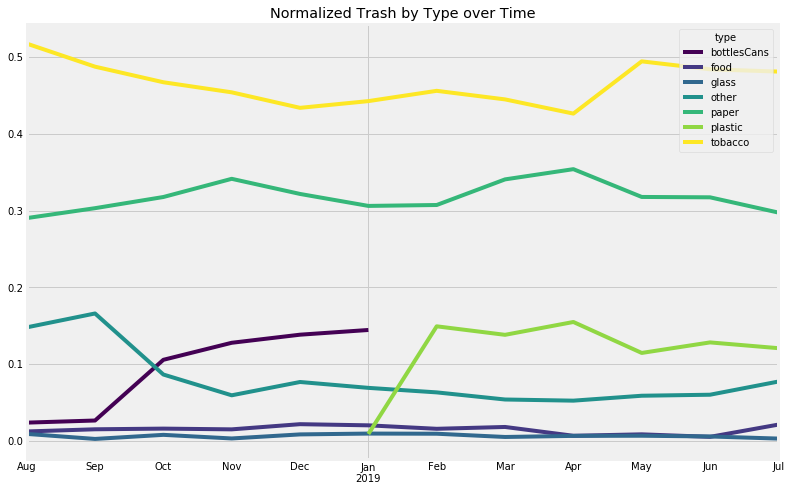

In [20]:
df =\
(pd.DataFrame(
    trash.set_index('time')
    .resample('M')
    .type
    .value_counts(normalize=True)
 )
 .unstack('type')
 .rename_axis(index=None)
)
df.columns = df.columns.get_level_values(1)
df.plot.line(title='Normalized Trash by Type over Time', figsize=(12, 8), cmap='viridis')

This plot demonstrates two caveats about the data ontology:

* The swap from `bottlesCans` to `plastic` occurred early in January 2019. `plastic` picks up almost exactly where `bottlesCans` left off, so there is no issue with data normality.
* Many items which were classified as "other" at the beginning of survey zone data collection were re-classified as `bottleCans` in October.

To normalize the data ontology, we will:
* Select just the subset of data from October (e.g. omit the first two months of data) for analysis.
* Convert `bottlesCans` records to `plastic` records.

In [21]:
len(trash), len(trash[trash['time'] >= pd.to_datetime('October 1 2018')])

(131391, 92825)

In [22]:
trash = trash[trash['time'] >= pd.to_datetime('October 1 2018')]

In [23]:
trash = trash.assign(type=trash['type'].map(lambda v: v if v != 'bottlesCans' else 'plastic'))

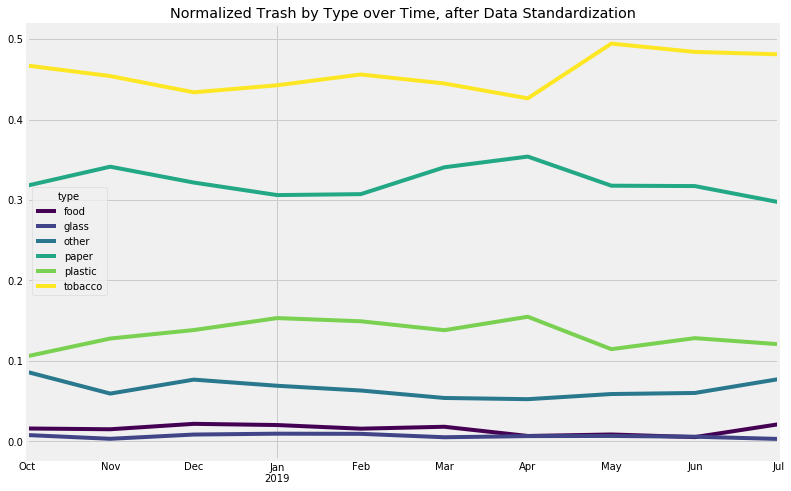

In [24]:
df =\
(pd.DataFrame(
    trash.set_index('time')
    .resample('M')
    .type
    .value_counts(normalize=True)
 )
 .unstack('type')
 .rename_axis(index=None)
)
df.columns = df.columns.get_level_values(1)
df.plot.line(title='Normalized Trash by Type over Time, after Data Standardization', figsize=(12, 8), cmap='viridis')

In [25]:
trash.description[trash.description.notnull()]

id
eE7W5mLjEph3eK1iJWyX                    halls
0hFxdpfNdoL6u9xRDybt                     #311
o5sNh3mIClIy53VfNopI             #311 hangers
7Ubs7SuLm3TxgLOmfb6h                      311
aAyn7XMAHLU68Rf1atQw                      art
RRSkEyiJJNTd1BhIwpTA               needle cap
zbIWodJqfWSvETMrK8HY                     juul
hPvVt5fdOy4qTB9woGU0                  crashed
GolWHZaJdl9xp0WKYeQZ                #311 poop
Hwz7UIaOppLlBYDGSg3B              #311 needle
71eLNgtjB1VVrgAShAqN                     #311
N9e7qoZv7woj9XKtrg7T                     #311
sn7vu4pDjdq9SzdaN5am                     #311
yIEXGL8RVklI8WWdtqKu              #311 needle
gtKLMJLCFqbvOLeSrBvZ              #311 needle
UoyZ4JwAicfI4CRRB2HD                     #311
qNALjeZA15s8SHU7XPgg                     #311
ovzBf72eHfNlGiVVpKCb                        🎃
eE7W5mLjEph3eK1iJWyX                    halls
6Z966R9z0MsIk35PR5Bd           #311 dead bird
HU2XvZCdhmYBBR7xBdCx                     #311
noPXnfryQAFRTxMlyKOZ        #31

The `description` field is usually empty. When filled, it is usually used for things that the Rubbish Runners will not handle: mainly sharps (e.g. heroin needles). This is not a comprehensive records of such objects, which are an "ocassional" sighting on runs.

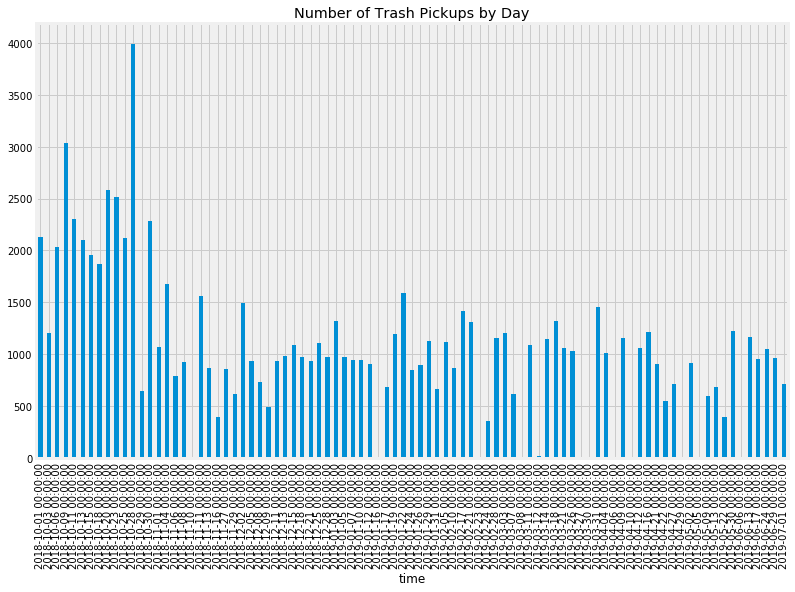

In [26]:
(trash
 .assign(n=0)
 .set_index('time')
 .resample('D')
 .n.count()
 .where(lambda v: v > 0)
 .dropna()
 .plot.bar(figsize=(12, 8), title='Number of Trash Pickups by Day')
)

There is some standard variability in the amount of trash picked up per run (where each run takes place on a single day). This chart includes both test inputs into the dataset, which are days featuring 1 or a handful (<10) records; and a pattern of higher-than usual activity at the beginning of the dataset collection period.

As a further processing step, let's remove singular or near-singular test records.

In [27]:
filter_dates = (trash
 .assign(n=0)
 .set_index('time')
 .resample('D')
 .n.count()
 .where(lambda v: v < 100)
 .dropna()
 .index
)

In [28]:
trash = trash[~trash.time.map(lambda v: v.replace(hour=0, minute=0, second=0)).isin(filter_dates)]

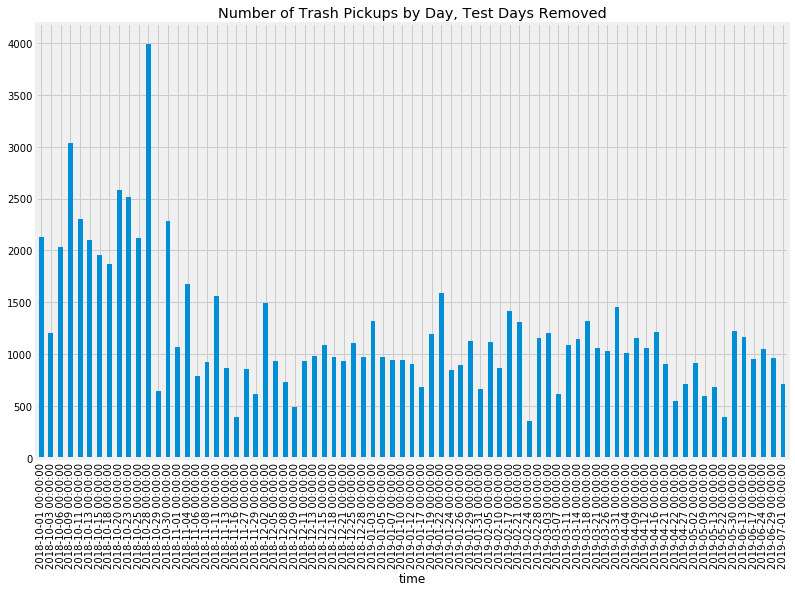

In [29]:
(trash
 .assign(n=0)
 .set_index('time')
 .resample('D')
 .n.count()
 .where(lambda v: v > 0)
 .dropna()
 .plot.bar(figsize=(12, 8), title='Number of Trash Pickups by Day, Test Days Removed')
)

We will come back to the higher-than-expected early data distribution later, when we analyze time trends.

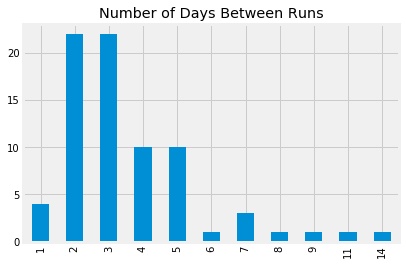

In [30]:
(pd.Series(
  trash
    .assign(n=0)
    .set_index('time')
    .resample('D')
    .n.count()
    .where(lambda v: v > 0)
    .dropna()
    .pipe(lambda srs: srs.index[1:] - srs.index[:-1])
    .days
    .values
 )
 .value_counts()
 .sort_index()
 .plot.bar(title='Number of Days Between Runs')
)

In [31]:
run_diffs = pd.Series(
  trash
    .assign(n=0)
    .set_index('time')
    .resample('D')
    .n.count()
    .where(lambda v: v > 0)
    .dropna()
    .pipe(lambda srs: srs.index[1:] - srs.index[:-1])
    .days
    .values
)
run_diffs.agg([np.mean, np.median, np.min, np.max])

mean       3.592105
median     3.000000
amin       1.000000
amax      14.000000
dtype: float64

The Rubbish Runners attempted to keep a consistent periodicity to their runs. The overall mean time between runs is 3.5 days, and the median time between runs is 3 days. There were a couple of periods where there were long breaks between runs.

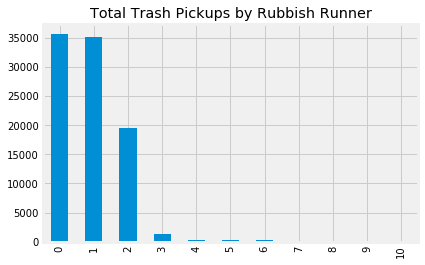

In [32]:
trash.user.value_counts().reset_index(drop=True).plot.bar(title='Total Trash Pickups by Rubbish Runner')

This plot shows the volume of pickup by runner (names have been anonymized). Each run attempts to have 100% coverage, and there isn't expected to be any significant difference between the strategies that the core team member use.

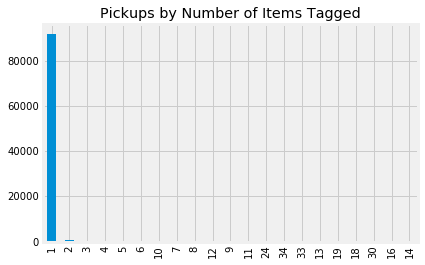

In [33]:
trash.totalNumberOfItemsTagged.value_counts().plot.bar(title='Pickups by Number of Items Tagged')

Most records record a single pickup, but it is possible for a user to specify a multi-number pickup. However, the occassions on which this is done are vanishingly small in number.

In [34]:
trash.pickedUp.value_counts()

True     90198
False     2563
Name: pickedUp, dtype: int64

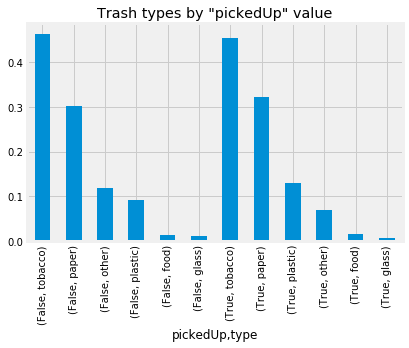

In [35]:
trash.groupby('pickedUp')['type'].value_counts(normalize=True).plot.bar(title='Trash types by "pickedUp" value')

The `pickedUp` value appears to be spurious?

Text(0.5, 1.0, 'Block by Trash Volume')

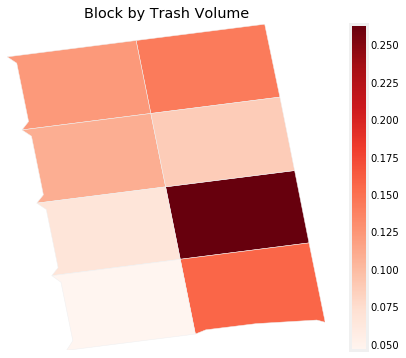

In [36]:
gplt.choropleth(
    blocks.sort_index(),
    hue=trash.sort_index().block_id.value_counts(normalize=True), cmap='Reds', k=None, legend=True
)
plt.title('Block by Trash Volume')

There is *very* significant geospatial throw in the amount of trash on each block. Here are a couple of other ways of looking at these differences:

Text(0.5, 1.0, 'Building Frontages by Trash Density')

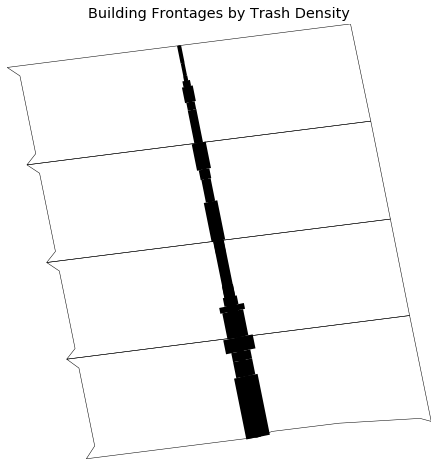

In [37]:
data = (
    trash.frontage_id.sort_index().value_counts() /
    frontages.geometry.length
)
ax = gplt.sankey(
    frontages.sort_index(), scale=data, limits=(1, 30),
    extent=frontages.geometry.buffer(0.001).total_bounds,
    figsize=(12, 8), color='black'
)
gplt.polyplot(blocks, ax=ax)
plt.title('Building Frontages by Trash Density')

Text(0.5, 1.0, 'Trash Volume per Building, Normalized by Area')

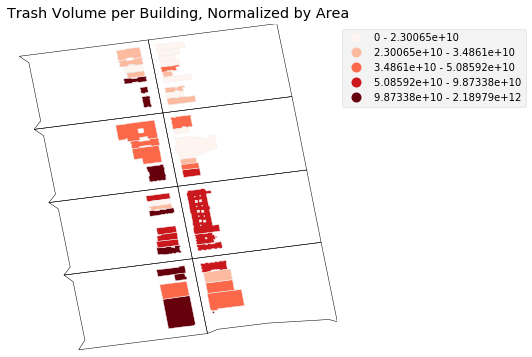

In [38]:
ax = gplt.choropleth(
    buildings.sort_index(),
    hue=trash.building_id.value_counts().sort_index() / buildings.sort_index().geometry.area,
    cmap='Reds', legend=True, legend_kwargs={'bbox_to_anchor': (1, 1)}
)
gplt.polyplot(blocks, ax=ax)
plt.title('Trash Volume per Building, Normalized by Area')

Some columns that do not provide any information that can safely be dropped are:

In [39]:
trash.drop(columns=['isSponsored', 'isValidated', 'likes']).head(0)

,itemsTagged,street,type,description,time,user,userEmail,userPrimaryCommunityName,userCity,userCityDistrict,...,long,totalNumberOfItemsTagged,pickedUp,photoURL,side,frontage_id,block_id,building_id,blockface_id,geometry
id,,,,,,,,,,,,,,,,,,,,,
